In [4]:
#importing necessary libraries
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense


# Data Pre-processing

In [5]:
img = cv2.imread('img_file2.jpg')

In [6]:
img #rgb scale of image color in array

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[123, 142, 163],
        [121, 139, 162],
        [120, 141, 168],
        ...,
        [254, 250, 225],
        [255, 250, 225],
        [253, 248, 223]],

       [[119, 140, 162],
        [117, 140, 162],
        [118, 141, 167],
        ...,
        [255, 251, 226],
        [255, 252, 227],
        [255, 250, 225]],

       [[117, 140, 162],
        [118, 142, 166],
        [117, 140, 166],
        ...,
        [255, 254, 228],
        [255, 251, 226],
        [255, 250, 225]]

In [7]:
img[0] #first row of array

array([[254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

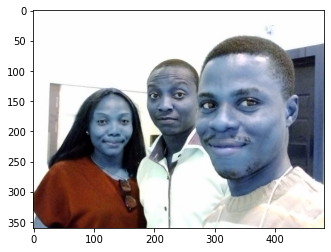

In [9]:
plt.imshow(img) #leads to color revert

In [10]:
img.shape

(360, 482, 3)

In [11]:
img[0]

array([[254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [12]:
# cv2.imshow('result', img) #opens a new window but blank and non-responsive

In [13]:
stop

NameError: name 'stop' is not defined

In [ ]:
while True:
    cv2.imshow('result', img)
    # 27 represents the ASCII code for ESCAPE
    if cv2.waitKey(2)==27:
        break
cv2.destroyAllWindows()

In [ ]:
# CHECK VIOLA-JONES OBJECT DETECTION FRAMEWORK
# Haar feature selection - Basically checks the common features/properties of the human faces
# Creating an Integral Image
# Adaboost Training
# Cascading Classifier

### We shall be using the 'haarcascade_frontalface_default.xml' for frontal face detection

In [ ]:
# Identify frontal face using the haar features

In [14]:
haar_data = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [15]:
haar_data.detectMultiScale(img)
# detect multiscale performs all calculations, performs a sliding window,
# search for all haar features in every sliding window on the image

array([[169, 102, 101, 101],
       [235,  83, 189, 189],
       [ 88, 149,  87,  87]], dtype=int32)

In [16]:
# The array above represents the x, y, width and height respectively of each individual face

## Detecting faces by drawing rectangles on them

In [17]:
# cv2.rectangle(img, (x,y),(w,h),(b,g,r), border_thickness)

In [18]:
while True:
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,255), 3)
    cv2.imshow('result', img)
    # 27 represents the ASCII code for ESCAPE
    if cv2.waitKey(2)==27:
        break
cv2.destroyAllWindows()

## Now let's detect the faces once again with the camera

In [ ]:
# First, let's check the camera working
camera = cv2.VideoCapture(0) # Turn on default camera - (1) turns on any other secondary camera(s)
while True:
    flag, img = camera.read() #flag returns true or false
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,255), 3)
        cv2.imshow('result', img)
        # 27 represents the ASCII code for ESCAPE
        if cv2.waitKey(2)==27:
            break
            
camera.release()
cv2.destroyAllWindows()

## Now let's detect whether the faces are with facemask or without facemask, and collect/extract images thereon.

In [19]:
# First, let's check the camera working
camera = cv2.VideoCapture(0) # Turn on default camera - (1) turns on any other secondary camera(s)
data_without_mask = []
while True:
    flag, img = camera.read() #flag returns true or false
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,255), 4)
            face = img[y:y+h,x:x+w, :]#slicing the face from the entire image
            face = cv2.resize(face,(50,50))#resizing all faces to same dimensions - in this case, it's 50 by 50 dimension
            print(len(data_without_mask))
            if len(data_without_mask) < 400:
                data_without_mask.append(face)#append the face variables inside 'data'
        cv2.imshow('result', img)
        # 27 represents the ASCII code for ESCAPE
        if cv2.waitKey(2)==27 or len(data_without_mask) >= 200:
            break
            
camera.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [20]:
#saving the data into a numpy
np.save('data_without_mask.npy',data_without_mask)

In [21]:
# First, let's check the camera working
camera = cv2.VideoCapture(0) # Turn on default camera - (1) turns on any other secondary camera(s)
data_with_mask = []
while True:
    flag, img = camera.read() #flag returns true or false
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,255), 3)
            face = img[y:y+h,x:x+w, :]#slicing the face from the entire image
            face = cv2.resize(face,(50,50))#resizing all faces to same dimensions - in this case, it's 50 by 50 dimension
            print(len(data_with_mask))
            if len(data_with_mask) < 400:
                data_with_mask.append(face)#append the face variables inside 'data'
        cv2.imshow('result', img)
        # 27 represents the ASCII code for ESCAPE
        if cv2.waitKey(2)==27 or len(data_with_mask) >= 200:
            break
            
camera.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [22]:
#saving the data into a numpy
np.save('data_with_mask.npy',data_with_mask)

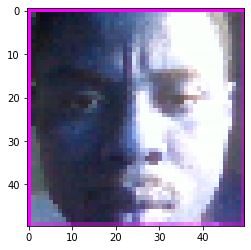

In [23]:
plt.imshow(data_without_mask[10])

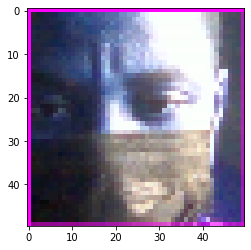

In [24]:
plt.imshow(data_with_mask[6])

In [25]:
without_mask = np.load('data_without_mask.npy')
with_mask = np.load('data_with_mask.npy')

In [26]:
without_mask.shape #Now we have 200 images without mask,having dimensions 55 by 55 by 3

(200, 50, 50, 3)

In [27]:
with_mask.shape

(200, 50, 50, 3)

## Converting the above 4-D into 2-D

In [28]:
with_mask = with_mask.reshape(with_mask.shape[0],with_mask.shape[1]*with_mask.shape[2]*with_mask.shape[3])
without_mask = without_mask.reshape(without_mask.shape[0],without_mask.shape[1]*without_mask.shape[2]*without_mask.shape[3])

In [29]:
print(with_mask.shape)
without_mask.shape

(200, 7500)


(200, 7500)

## Combining the data for with/without mask -  Ensuring that the 1st 200 rows are 'with_mask' and the rest 200 rows are 'without_mask', leading us to building the train and test data.

In [30]:
#r_ is used to concatenate rows
X = np.r_[without_mask,with_mask] #train data
X.shape 

(400, 7500)

## Challenge - ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 7500 and the array at index 1 has size 9075

## Mapping with_mask and without_mask as 0 and 1 respectively

In [31]:
labels = np.zeros(X.shape[0])
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
labels[200:] = 1.0

In [33]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [34]:
names = {0:'Without Mask', 1:'Mask'}

# Performing Machine Learning Algorithm

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25)

In [37]:
X_train.shape

(300, 7500)

In [38]:
# we observe we have too much columns here and can slow the speed of execution,
# so we use Dimensional Reduction (PCA) to reduce to only important features
# this uses Eigen Values AND Eigen Vectors

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_train.shape

(300, 3)

In [41]:
X_train[0]

array([ 1145.66999499, -1781.33562011,  -135.95375034])

In [42]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [43]:
# we also need to transform the test data
X_test = pca.fit_transform(X_test)
X_test.shape

(100, 3)

In [44]:
y_pred = svc.predict(X_test)

In [45]:
accuracy_score(y_pred,y_test)

1.0

In [46]:
# First, let's check the camera working
haar_data = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
camera = cv2.VideoCapture(0) # Turn on default camera - (1) turns on any other secondary camera(s)
data = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = camera.read() #flag returns true or false
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,255), 4)
            face = img[y:y+h,x:x+w, :]#slicing the face from the entire image
            face = cv2.resize(face,(50,50))#resizing all faces to same dimensions - in this case, it's 50 by 50 dimension
            face = face.reshape(1,-1)
            face = pca.transform(face)
            pred = svc.predict(face)[0]
            name = names[int(pred)]
            cv2.putText(img, name, (x,y), font, 1, (244,250,250), 2)
            print(name)
        cv2.imshow('result', img)
        # 27 represents the ASCII code for ESCAPE
        if cv2.waitKey(2)==27:
            break
            
camera.release()
cv2.destroyAllWindows()

Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Without Mask
Mask
Mask
Mask
Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Ma

In [ ]:
stop

In [ ]:
cnn = Sequential([Conv2D(filters=100, kernel_size=(3,3), 
                    activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=100, kernel_size=(3,3), 
                    activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Flatten(),
                    Dropout(0.5),
                    Dense(50),
                    Dense(35),
                    Dense(2)])

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
labels_dict={0:'No mask',1:'Mask'}
color_dict={0:(0,0,255),1:(0,255,0)}
imgsize = 4 #set image resize
camera = cv2.VideoCapture(0) # Turn on camera

In [ ]:
# Identify frontal face using the haar features
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
while True:
    (rval, im) = camera.read()
    im=cv2.flip(im,1,1) #mirrow the image
    imgs = cv2.resize(im, (im.shape[1] // imgsize, im.shape[0] //
    imgsize))
    face_rec = classifier.detectMultiScale(imgs) 
    for i in face_rec: # Overlay rectangle on face
        (x, y, l, w) = [v * imgsize for v in i] 
        face_img = im[y:y+w, x:x+l]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=cnn.predict(reshaped)
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(im,(x,y),(x+l,y+w),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+l,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-
        10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    cv2.imshow('LIVE',im)
    key = cv2.waitKey(10)
    # stop loop by ESC
    if key == 27: # The Esc key
        break

webcam.release()
cv2.destroyAllWindows()